# **Student Performance Indicator**

### Life Cycle of Project


*   Understanda the Problem Statement
*   Data Collection
*   Data Checks to perform
*   EDA
*   Data Pre-Processing
*   Model Training
*   Model Tuning
*   Chossing the best model



### 1] Problem Statement:

*  This project helps to understand how the student's performance is affected by other variables such as Gender, Ethencity, Parental Level Of Education, Lunch and Test preparation course.

### 2] Data Collection:

DataSource: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


2.1] Importing required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('data/stud.csv')

Looking at the top records of dataset

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [5]:
df.shape

(1000, 8)

This shows that there are 1000 rows and 8 cols

2.1 getting info of dataset:


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Getting the unique values of each categorical data

In [12]:
cols = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
for i in cols:
    print(f'{i} unique values are: {df[i].unique()}')

gender unique values are: ['female' 'male']
race/ethnicity unique values are: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education unique values are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch unique values are: ['standard' 'free/reduced']
test preparation course unique values are: ['none' 'completed']


As there are 8 cols(Independent/Feature Variables):
*  gender: Which is sex of students (male/female) is of object dtype
*  race/ethnicity: consists of, group B group C group A group D group E which are object dtype
*  parental level education: is also a dtype column which consits of, bachelor's degree ,some college ,master's degree ,associate's degree
    high school ,some high school
*  lunch: This is column is of object dtype whose values are standard, free/reduced
*  test test preparation course unique values are: none ,completed which is of object dtype column
*  math score, reading score, writing score: all these are int dtypes which tells about the student's score in particular area.

2.3 Describing the dataset

In [14]:
#for numerical features
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
#for categorical features

df.describe(include=['object'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


### **Data Checks to perform**

* check missing values
* check for duplicates
* check dtype
* check unique values


3.1 Looking  for missing values:

In [17]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no miising values in dataset

3.2 Looking for duplicate records in dataset

In [20]:
df.duplicated().sum()

'''
dup=[]
for i in df.columns:
    if df[i].duplicated().any():
        dup.append(i)
print(f'duplicated presents are {dup}')        

if dup:
    new_df = df.drop_duplicates(inplace=True)
    print('duplicates are removed)
'''

"\ndup=[]\nfor i in df.columns:\n    if df[i].duplicated().any():\n        dup.append(i)\nprint(f'duplicated presents are {dup}')        \n\nif dup:\n    new_df = df.drop_duplicates(inplace=True)\n    print('duplicates are removed)\n"

There are no duplicates in datasets

Defining numerical and categorical Features

In [23]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

print(f'We have {len(numerical_features),numerical_features} numerical features')
print(f'We have {len(categorical_features), categorical_features} categorical features')

We have (3, ['math score', 'reading score', 'writing score']) numerical features
We have (5, ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']) categorical features


Creating two new target variablles total score and average:

In [24]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

In [25]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [27]:
reading_score_100 = df[df['reading score']==100]['average'].count()
writing_score_100 = df[df['writing score']==100]['average'].count()
math_score_100 = df[df['math score']==100]['average'].count()

print(f'students with reading score of 100 {reading_score_100}')
print(f'students with writing score of 100 {writing_score_100}')
print(f'students with math score of 100 {math_score_100}')


reading_score_30 = df[df['reading score']<=30]['average'].count()
writing_score_30 = df[df['writing score']<=30]['average'].count()
math_score_30 = df[df['math score']<=30]['average'].count()

print(f'students with reading score of 30 {reading_score_30}')
print(f'students with writing score of 30 {writing_score_30}')
print(f'students with math score of 30 {math_score_30}')

students with reading score of 100 17
students with writing score of 100 14
students with math score of 100 7
students with reading score of 30 8
students with writing score of 30 10
students with math score of 30 16


### **4. Data Visualization**

<Axes: xlabel='average', ylabel='Count'>

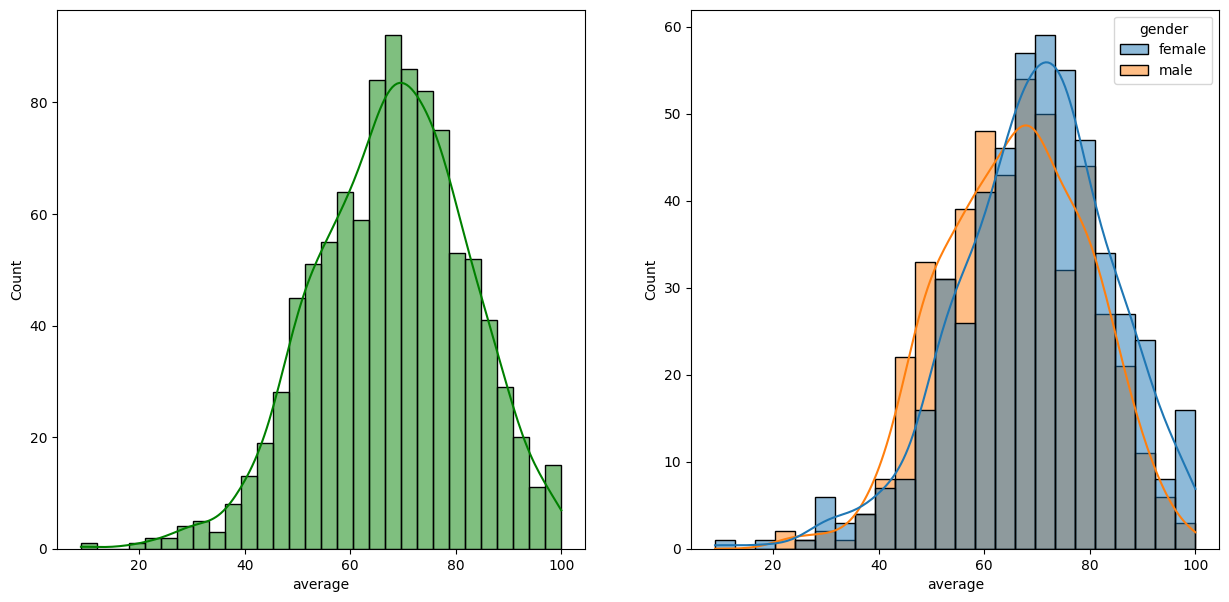

In [28]:
fig,axs = plt.subplots(1,2, figsize=(15,7))

plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')


<Axes: xlabel='total score', ylabel='Count'>

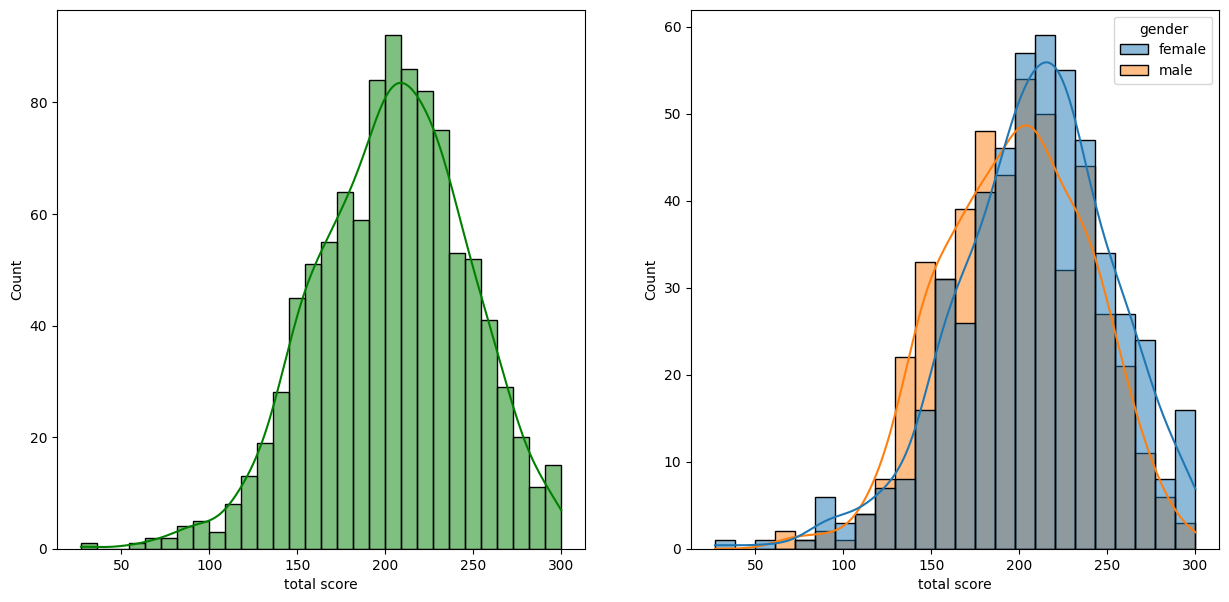

In [29]:
fig,axs = plt.subplots(1,2, figsize=(15,7))

plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')


Female students are performing well than male students

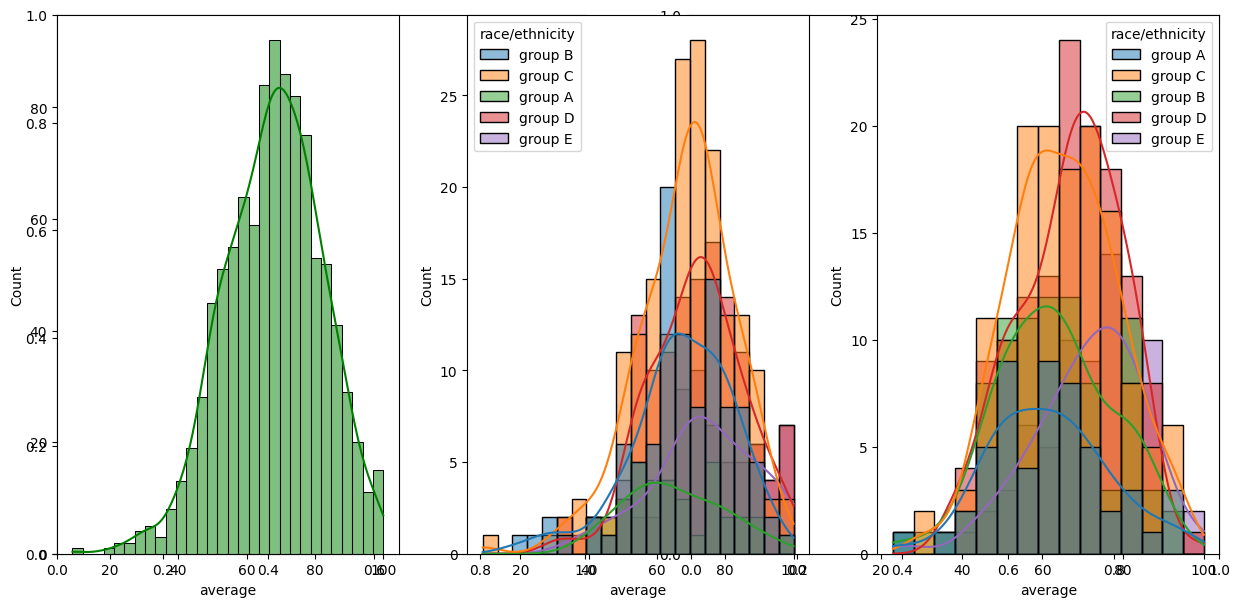

In [30]:
fig,axs = plt.subplots(1,2, figsize=(15,7))

plt.subplot(131)
ax=sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')


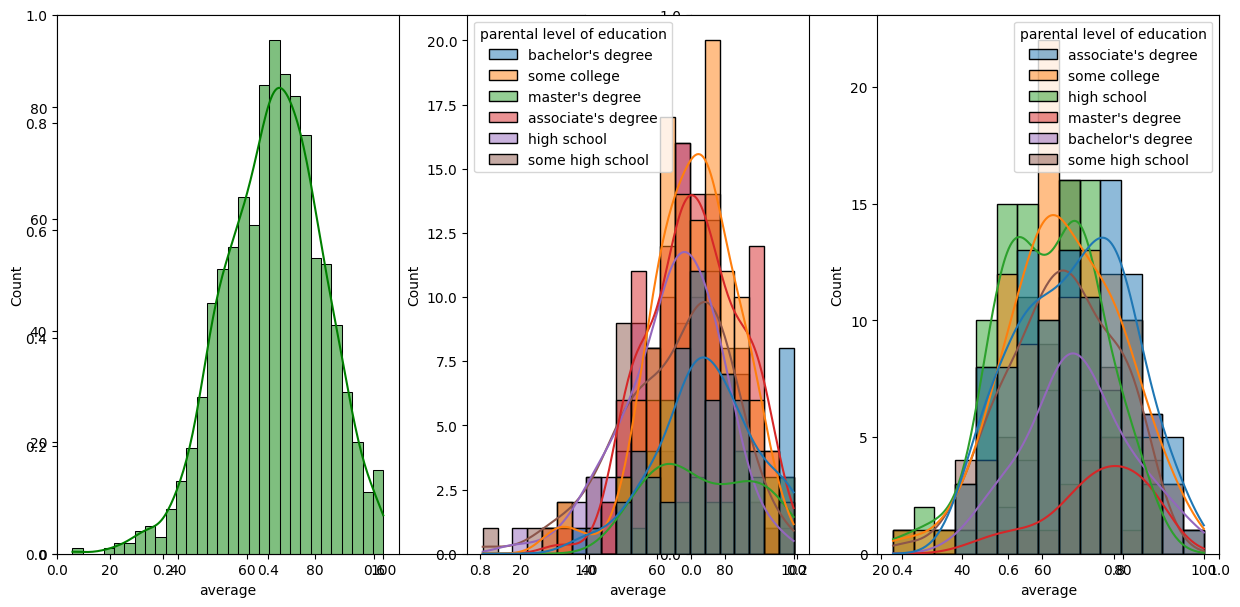

In [32]:
fig,axs = plt.subplots(1,2, figsize=(15,7))

plt.subplot(131)
ax=sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')


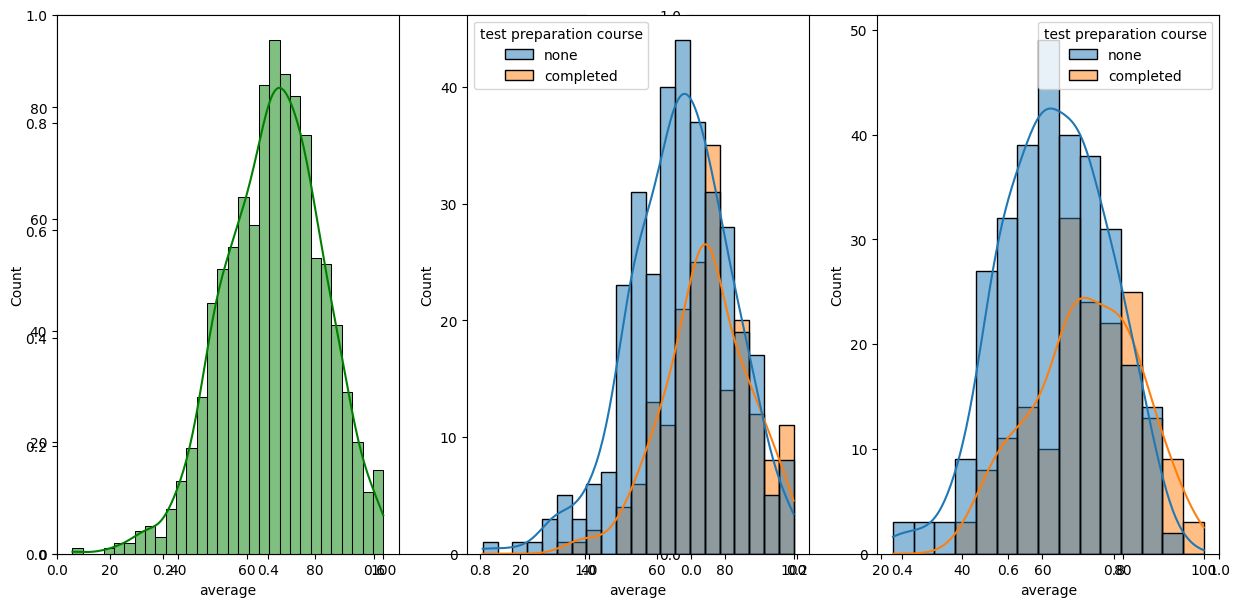

In [34]:
fig,axs = plt.subplots(1,2, figsize=(15,7))

plt.subplot(131)
ax=sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='test preparation course')
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='test preparation course')


In [31]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
